In [57]:
# Pipeline to create an embedding 
# Task classification or similarity 

In [58]:
# Data that's stored or kept track of

# Use lists
# Minimize data types


#0  Paired data or n-dim data.  
# 0a) nested lists or parallel lists?  
# -- > with a nested list, we keep track of index without random shifts
# --> with a nested list, we can be jagged.  every nested list does not have to be the same length
# --> with a nested list, we can keep nesting

# --> parallel lists are more visually similar to dataframes / spreadsheets 
# --> with parallel lists, index should be immutable
# --> ** There is only one level of nesting needed for all columns in a 2-d spreadsheet, which is how people are used to thinking


# First pair.  # Then n-dim.  

#1  Embedding vector for each data point.  # of embedding vectors = # of data points.  Initialize to a random
#2  Loss Function.  Calculate loss function
#3 Error.  Initialize to a large number.  Then calculate with loss function.  Update with each iteration.  
#4 Iteration #
#5  When to stop.  Can initially set a large enough iteration number


In [59]:
from operator import add
import numpy as np
import pandas as  pd

In [60]:


df = pd.read_csv('elements.csv')
for i in df.columns:
    print (i)

AtomicNumber
Element
Symbol
AtomicMass
NumberofNeutrons
NumberofProtons
NumberofElectrons
Period
Group
Phase
Radioactive
Natural
Metal
Nonmetal
Metalloid
Type
AtomicRadius
Electronegativity
FirstIonization
Density
MeltingPoint
BoilingPoint
NumberOfIsotopes
Discoverer
Year
SpecificHeat
NumberofShells
NumberofValence


In [61]:
Element=df['Element'].tolist()
Symbol=df['Symbol'].tolist()

features = [Symbol, Element]  # a list of lists  # in this case the second index will attack inside the list, # first index is the feature # can have as many features as you want

p = 6
print(features[0][p], features[1][p])  

print(len(features))
print(len(features[0]))


N Nitrogen
2
118


In [62]:
# which embeddings should be mapped to the same space:

# em[0][0] should be mapped to the same space as em [1][0]  - the first index moves across the features
# so the loss function should be set to maximize the closeness between above two 
# loss func minimizes distance between em[0][0] and em[1][i!=0]

# which cases does this leave unaccounted for 
#it leaves unaccounted for all the embeddings for datapoints in the same column
# are they duplicates of each other OR are they really far apart? 

# this is actually a way of negative counting - understanding falseness
# 

In [63]:



numberoffeatures=2
numberofdatapoints = 118  # H, He, Li,...
lengthofembeddingvector = 7

#initialize training hyperparameters
training_iterations = 1000


In [64]:
# INITIALIZE EMBEDDING VECTORS! 

import random




em = [[[0 for _ in range(lengthofembeddingvector)] for i in range(numberofdatapoints)] for i in range(numberoffeatures)]



for i in range(len(em)):
    for j in range(len(em[0])):
        for k in range(len(em[0][0])):
          
            em[i][j][k] = random.random()


In [65]:
# OPTIMIZE

def optimize(datapoint:int , em) -> list:
    
    pair =   [em[0][datapoint], em[1][datapoint]] 

    def distance(pair):
        distance = 0  # some default value 
        for k in range(lengthofembeddingvector):
            distance_per_element = pair[0][k] - pair[1][k]
            distance += distance_per_element
        
        return distance
    
    # START ITERATION 

    


    #track loss
    loss=[]

    # Iteration to find optimal embeddings
    for i in range(100):   
        
        current_distance = distance(pair)
        loss.append(current_distance)

        proposed_embeddings=[]
        for j in pair:  # later this should be for every embedding vector
            shift = [random.random() for i in range(lengthofembeddingvector)]
            proposed_embedding = list( map(add, j, shift) )
            proposed_embeddings.append(proposed_embedding)

        new_distance = distance(proposed_embeddings)
        
        
        if np.abs(new_distance) < np.abs(current_distance):
            pair = proposed_embeddings  

    return pair, loss


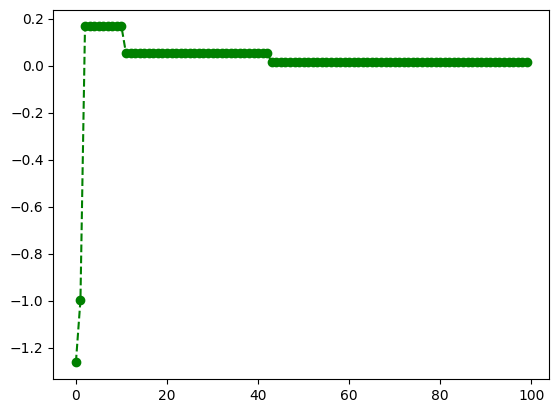

In [66]:
# PLOT LOSS

import matplotlib.pyplot as plt




j=0
k=65
unpaired = [em[0][j], em[1][k]]  # remember here the first index moves across the features


datapoint = 45  # so you want to run through all the data points 
pair, loss = optimize(datapoint, em)


iteration = [i for i in range(len(loss))]

plt.plot(iteration, loss, '--go', label='line with marker')
#plt.scatter(iteration, loss)
plt.show()



In [67]:
j=datapoint

paired_data= [features[0][j], features[1][j]] # remember the third index goes into the vector itself.  the first index moves across features

print('Optimized Embeddings')
for i in range(len(features)):
    print(paired_data[i], ':', pair[i])

    



Optimized Embeddings
Pd : [2.4496697499673443, 2.1522817882265737, 2.9864954256528087, 1.6604125273305752, 3.4723943014723644, 2.578604871508934, 3.5584891106413004]
Palladium : [2.719211271101659, 2.370116356427105, 2.1841224769596024, 2.9645378098262367, 3.4102142621986746, 2.1907650579906903, 3.0035678897337568]


In [68]:
# OPTIMIZE

def optimize_all_embeddings(em) -> list:
    
    

    
    
    

    
    def loss(em):
        datapoints = len(em[0])
        
        
        
        
        def distance(pair):
            distance = 0  # some default value 
            for k in range(lengthofembeddingvector):
                distance_per_element = pair[0][k] - pair[1][k]
                distance += distance_per_element
        
            return distance
        
        
        
        numerator = 0
        for i in range(datapoints):
            
            pair =   [em[0][i], em[1][i]]   # these pairs are aligned to be the same 
            
            d = distance(pair)
            numerator +=d
            
            denominator = 0  
            for j in range(datapoints):
                    if j==i:
                        continue
                    else:
                        pair =   [em[0][j], em[1][j]] # these pairs are different # negative marking 
                        d = distance(pair)
                        denominator +=d
                        
            loss = numerator / denominator
                        
        return loss
            
    #track loss
    loss_track=[]
        
        
    proposed_em = em
    # START ITERATION 
    # Iteration to find optimal embeddings
    for i in range(training_iterations):   
        
            current_loss= loss(em)
            loss_track.append(current_loss)

            for i in range(len(em)):  # for every feature
                for j in range(len(em[0])):  # for every datapoint
                
                    vector = em[i][j]
                    shift = [random.random() for i in range(lengthofembeddingvector)]
                    proposed_vector  = list( map(add, vector, shift) )  # this proposes 1 new vector
                    proposed_em[i][j] = proposed_vector

                    
                    new_loss = loss(proposed_em)
        
                    if np.abs(new_loss) < np.abs(current_loss):  # this never accepts higher energy solutions, so why is the loss increasing 
                        em = proposed_em # update the variable that stores embeddings 
                
                    

    return em, loss_track

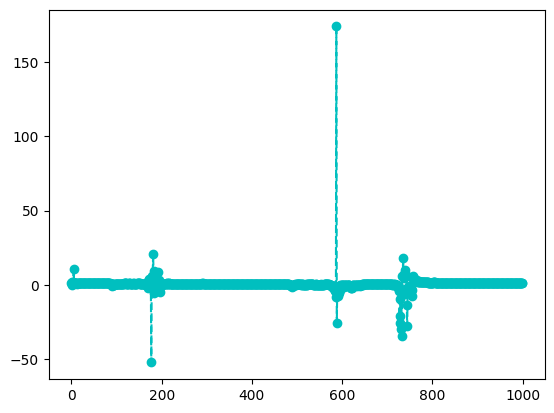

In [69]:
# PLOT LOSS

import matplotlib.pyplot as plt



em, loss_track = optimize_all_embeddings(em)


iteration = [i for i in range(len(loss_track))]

plt.plot(iteration, loss_track, '--co', label='line with marker')
#plt.scatter(iteration, loss)
plt.show()

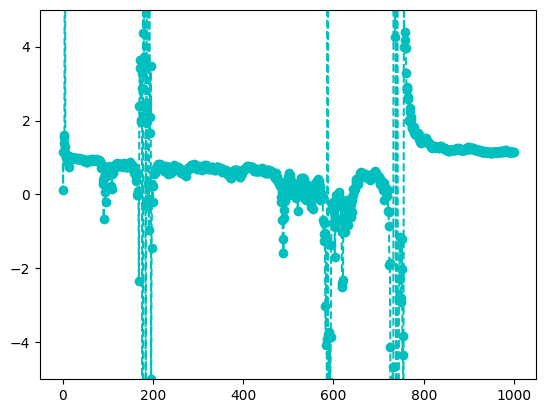

In [70]:

plt.plot(iteration, loss_track, '--co', label='line with marker')
plt.ylim((-5,5))
plt.show()
